### EDA and Feature Engineering of Google Play store dataset

1. Problem statement: Today 1.85 million different apps are available for users to download. Android users have been even more from which to choose, with 2.56 million available through the Google Play Store. These apps have come to play a huge role inn the way we live our lives today. Our objective is to find the Most Popular Category, Fing the apps with largest number of installs, the App with largest size, etc.

#### Steps I am Going to Follow

1. Data Cleaning

2. Exploratory Data Analysis

3. Feature Engineering

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

##### 1. Data Cleaning

In [3]:
df = pd.read_csv('googleplaystore.csv')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


---

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


- There are 13 columns and 10841 rows

- 12 columns are of object types and 1 (Rating) is of float

- Rating column has highest number of missing values

---

In [5]:
df.describe()   # numerical summary

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


---

In [6]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

- `Rating` column has 1474 missing values 

- `Type` and `Content Rating` has 3 and `Current Ver` and `Android Ver` has 8 and 3 respectively.

---

In [7]:
df['Reviews'].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'],
      shape=(6002,), dtype=object)

In [8]:
df['Reviews'].str.isnumeric().sum()

np.int64(10840)

- So, there is one value in this `Reviews` column that has a string value

Let's see what it is:

In [9]:
df[~df['Reviews'].str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


- This 3.0M is going to cause problem during feature engineering when we type-cast the object into integer. 

Let's delete this (since its just a single line).

In [10]:
df_copy = df.copy()

Made a copy just in case.

In [11]:
df_copy.drop(df_copy.index[10472], inplace=True)

In [12]:
df_copy[~df_copy['Reviews'].str.isnumeric()]   # done

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


- Now convert `Reviews` datatype into integer

In [13]:
df_copy['Reviews'] = df_copy['Reviews'].astype(int)

In [14]:
df_copy['Reviews'].dtype

dtype('int64')

---

In [15]:
df_copy['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

- So there is one row with value `Varies with device`

In [16]:
df_copy['Size'].isnull().sum()

np.int64(0)

- No Null values

- There are no null values, then lets just handle the 'M' and 'k' so we can convert the column into integer.

In [17]:
df_copy['Size'] = df_copy['Size'].str.replace('M', '000')
df_copy['Size'] = df_copy['Size'].str.replace('k', '')
df_copy['Size'] = df_copy['Size'].replace('Varies with device', np.nan)

what i did here is that i converted all the values with 'M' into values that have 'k'. like (19M == 19000k).

Then i removed the zeros from the 'k' values so i can have the whole column with numerical values with unit has 1000 or 'k'

and ofcourse we also replace the `Varies with device` with nan and the nan will be handled later.

In [18]:
df_copy['Size'] = df_copy['Size'].astype(float)

In [19]:
df_copy['Size'].dtype

dtype('float64')

In [20]:
df_copy['Size']

0        19000.0
1        14000.0
2            8.7
3        25000.0
4            2.8
          ...   
10836    53000.0
10837        3.6
10838        9.5
10839        NaN
10840    19000.0
Name: Size, Length: 10840, dtype: float64

Here the column is converted into float.

---

In [21]:
df_copy['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

- In `Price` column we have dollar sign ($). We can replace it by blank space.

In [22]:
df_copy['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

- In `Installs` column to we have plus (+) and comma (,) which we need to replce by blank space.

In [23]:
chars_to_remove = ['+', ',', '$']
cols_to_clean = ['Installs', 'Price']
for item in chars_to_remove:
    for col in cols_to_clean:
        df_copy[col] = df_copy[col].str.replace(item, '')

In [24]:
df_copy['Installs'].unique()

array(['10000', '500000', '5000000', '50000000', '100000', '50000',
       '1000000', '10000000', '5000', '100000000', '1000000000', '1000',
       '500000000', '50', '100', '500', '10', '1', '5', '0'], dtype=object)

In [25]:
df_copy['Price'].unique()

array(['0', '4.99', '3.99', '6.99', '1.49', '2.99', '7.99', '5.99',
       '3.49', '1.99', '9.99', '7.49', '0.99', '9.00', '5.49', '10.00',
       '24.99', '11.99', '79.99', '16.99', '14.99', '1.00', '29.99',
       '12.99', '2.49', '10.99', '1.50', '19.99', '15.99', '33.99',
       '74.99', '39.99', '3.95', '4.49', '1.70', '8.99', '2.00', '3.88',
       '25.99', '399.99', '17.99', '400.00', '3.02', '1.76', '4.84',
       '4.77', '1.61', '2.50', '1.59', '6.49', '1.29', '5.00', '13.99',
       '299.99', '379.99', '37.99', '18.99', '389.99', '19.90', '8.49',
       '1.75', '14.00', '4.85', '46.99', '109.99', '154.99', '3.08',
       '2.59', '4.80', '1.96', '19.40', '3.90', '4.59', '15.46', '3.04',
       '4.29', '2.60', '3.28', '4.60', '28.99', '2.95', '2.90', '1.97',
       '200.00', '89.99', '2.56', '30.99', '3.61', '394.99', '1.26',
       '1.20', '1.04'], dtype=object)

- Now that we have cleaned our column by getting rid of special characters we can type cast this 2 columns:

In [26]:
df_copy['Installs'] = df_copy['Installs'].astype(int)
df_copy['Price'] = df_copy['Price'].astype(float)

In [27]:
print(df_copy['Installs'].dtype)
print(df_copy['Price'].dtype)

int64
float64


---

In [28]:
df_copy['Last Updated'].unique()

array(['January 7, 2018', 'January 15, 2018', 'August 1, 2018', ...,
       'January 20, 2014', 'February 16, 2014', 'March 23, 2014'],
      shape=(1377,), dtype=object)

- Let's convert the `Last Updated` column into datetime.

In [29]:
df_copy['Last Updated'] = pd.to_datetime(df_copy['Last Updated'])

In [30]:
df_copy['Last Updated']

0       2018-01-07
1       2018-01-15
2       2018-08-01
3       2018-06-08
4       2018-06-20
           ...    
10836   2017-07-25
10837   2018-07-06
10838   2017-01-20
10839   2015-01-19
10840   2018-07-25
Name: Last Updated, Length: 10840, dtype: datetime64[ns]

- Now,that we have a datetime column we can extract the day, month, and year and put them in seperate columns because Splitting a single date column into separate day, month, and year columns is done to facilitate analysis, grouping, and feature engineering. For example, you can easily aggregate data by month or year, or use these separate components as individual features in a machine learning model, which is often difficult or impossible with a single combined string or object column.

In [31]:
df_copy['Day'] = df_copy['Last Updated'].dt.day
df_copy['Month'] = df_copy['Last Updated'].dt.month
df_copy['Year'] = df_copy['Last Updated'].dt.year

In [32]:
df_copy.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,15,1,2018


- Let's save our clean data file just in case:

In [33]:
df_copy.to_csv('data/google_cleaned.csv')

Now that i have cleaned all the data the next step is to perform Exploratory Data Analysis

##### 2. Exploratory Data Analysis (EDA)

In [34]:
df_copy.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,15,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,20,6,2018


In [35]:
df_copy[df_copy.duplicated('App')].shape

(1181, 16)

- The `App` Column has about 1181 duplicate values. Let's remove this values:

In [36]:
df_copy.drop_duplicates(subset=['App'], keep='first', inplace=True)

In [37]:
df_copy.shape

(9659, 16)

---


In [38]:
numeric_features = [feature for feature in df_copy.columns if df_copy[feature].dtype != 'O']
categorical_features = [feature for feature in df_copy.columns if df_copy[feature].dtype == 'O']

# Print columns 
print('We have {} numerical features: {}'.format(len(numeric_features), numeric_features))
print('We have {} categorical features: {}'.format(len(categorical_features), categorical_features))

We have 9 numerical features: ['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Last Updated', 'Day', 'Month', 'Year']
We have 7 categorical features: ['App', 'Category', 'Type', 'Content Rating', 'Genres', 'Current Ver', 'Android Ver']


*Feature Information:*

1. App: Name of the App.

2. Category = Category under which the App falls.

3. Rating = Applications rating on the playstore.

4. Reviews = Number of reviews of the App.

5. Size = Size of the App.

6. Install = Number of Installs of the App.

7. Type = If the App is free/paid.

8. Price = Price of the app (0 if it is free)

9. Content Rating = Appropriate target audience of the App.

10. Genres = Genre under which the App falls.

11. Last Updated = Date when the app was last updated

12. Current Ver + Current version of the application.

13. Android Ver = Minimum Android vcersion required to run the App.

14. Day = Day of the Last Update

15. Month = Month of the last update.

16. Year = Year of the last update.

- Lets find each category count of each category in each categorical column

In [40]:
for col in categorical_features:
    print(df_copy[col].value_counts())
    print('---------------------------------------------')

App
Photo Editor & Candy Camera & Grid & ScrapBook        1
Coloring book moana                                   1
U Launcher Lite – FREE Live Cool Themes, Hide Apps    1
Sketch - Draw & Paint                                 1
Pixel Draw - Number Art Coloring Book                 1
                                                     ..
Sya9a Maroc - FR                                      1
Fr. Mike Schmitz Audio Teachings                      1
Parkinson Exercices FR                                1
The SCP Foundation DB fr nn5n                         1
iHoroscope - 2018 Daily Horoscope & Astrology         1
Name: count, Length: 9659, dtype: int64
---------------------------------------------
Category
FAMILY                 1832
GAME                    959
TOOLS                   827
BUSINESS                420
MEDICAL                 395
PERSONALIZATION         376
PRODUCTIVITY            374
LIFESTYLE               369
FINANCE                 345
SPORTS                  325
COMMU

---

- Properties of count data on numerical columns

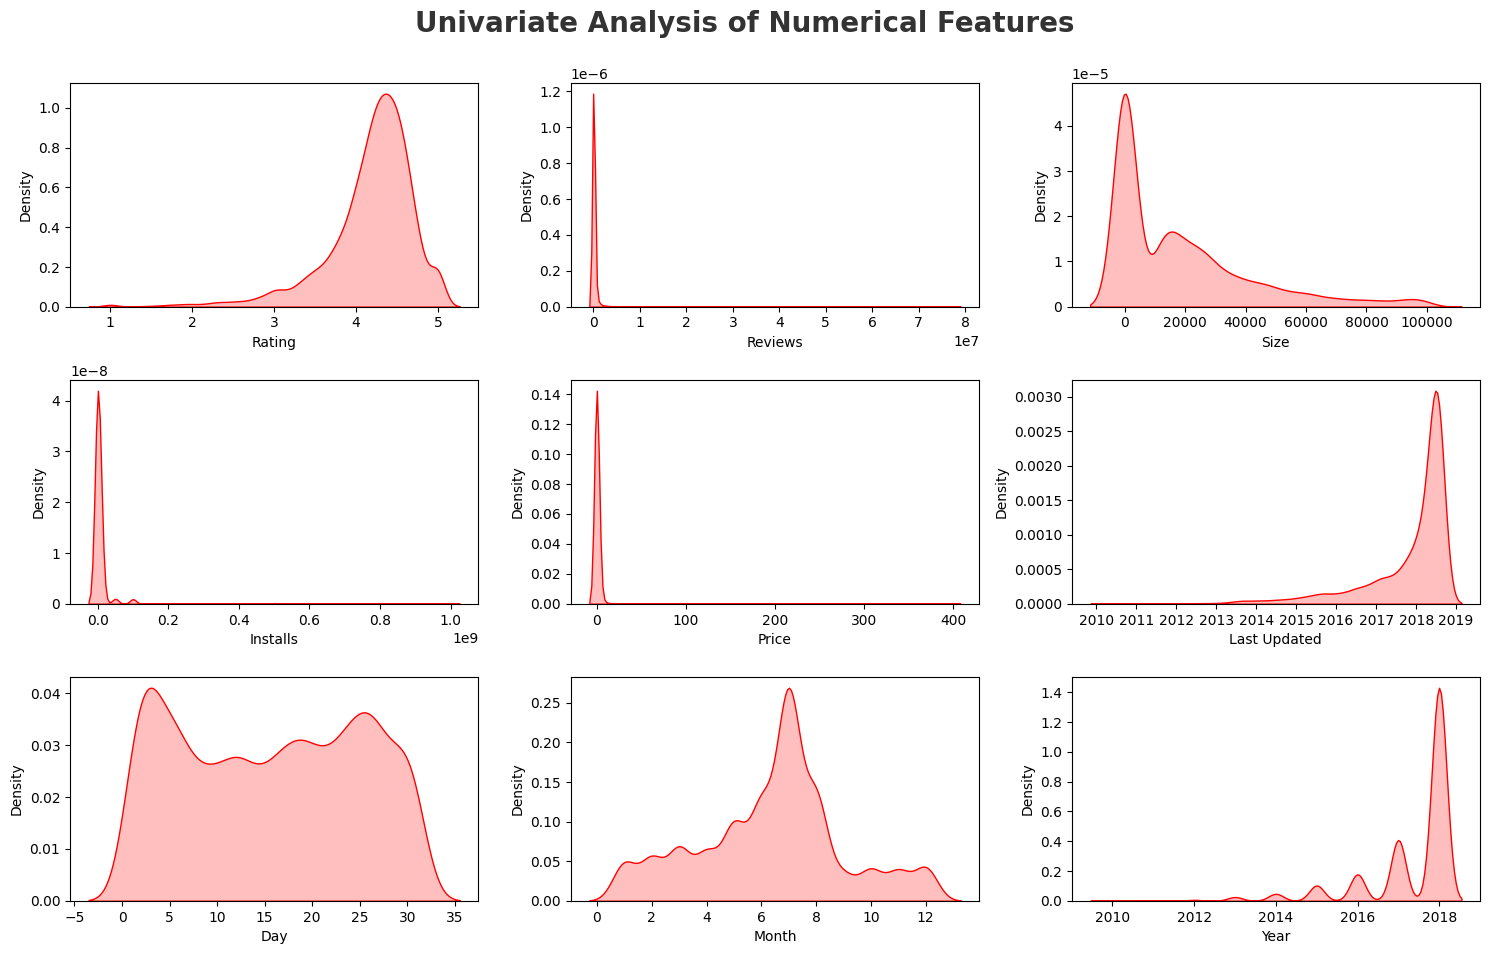

In [58]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numeric_features)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df_copy[numeric_features[i]], fill=True, color='r')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()
    
plt.show()

##### General Conclusion
Most of the features (Reviews, Size, Installs, Price) exhibit extreme right-skewness and a high concentration of values at or near zero. This pattern is very common in app store data and indicates:

1. A large number of small/unpopular/free apps.

2. The presence of a few dominant applications that are very popular (high installs/reviews) or have very high values (large size/price).

The time-related features (Last Updated (Year) and Year) show a clear trend towards recent data, with the bulk of the observations coming from 2017 and 2018.

---

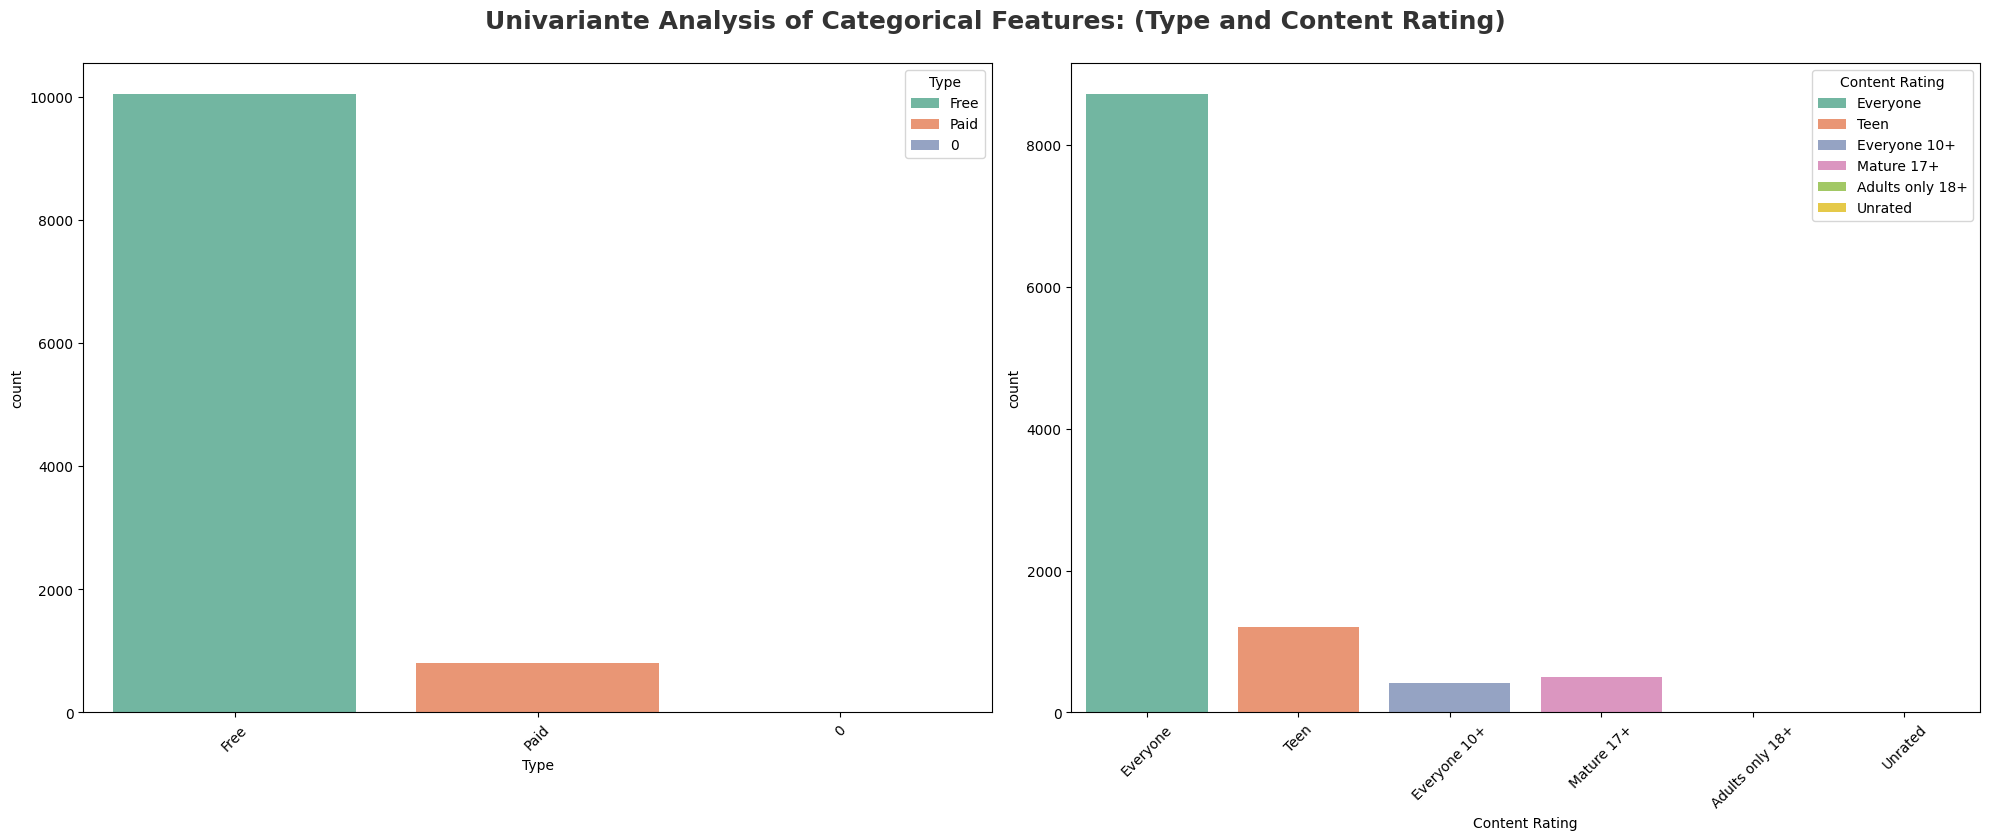

In [63]:
plt.figure(figsize=(20, 15))
plt.suptitle('Univariante Analysis of Categorical Features: (Type and Content Rating)', fontsize=18, fontweight='bold', alpha=0.8, y=1.)
category = ['Type', 'Content Rating']
for i in range(0, len(category)):
    plt.subplot(2,2, i+1)
    sns.countplot(x=df[category[i]], hue=df[category[i]], palette='Set2')
    plt.xlabel(category[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.show()

##### General Conclusion

The dataset is highly representative of a consumer-focused, general-audience app store. The strong dominance of Free apps and 'Everyone' content ratings suggests that most of the available applications are designed to be freely accessible and suitable for a wide range of users, including children.

---

*Q. Which is the most poppular app category in the app store?*

In [65]:
df_copy.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,15,1,2018


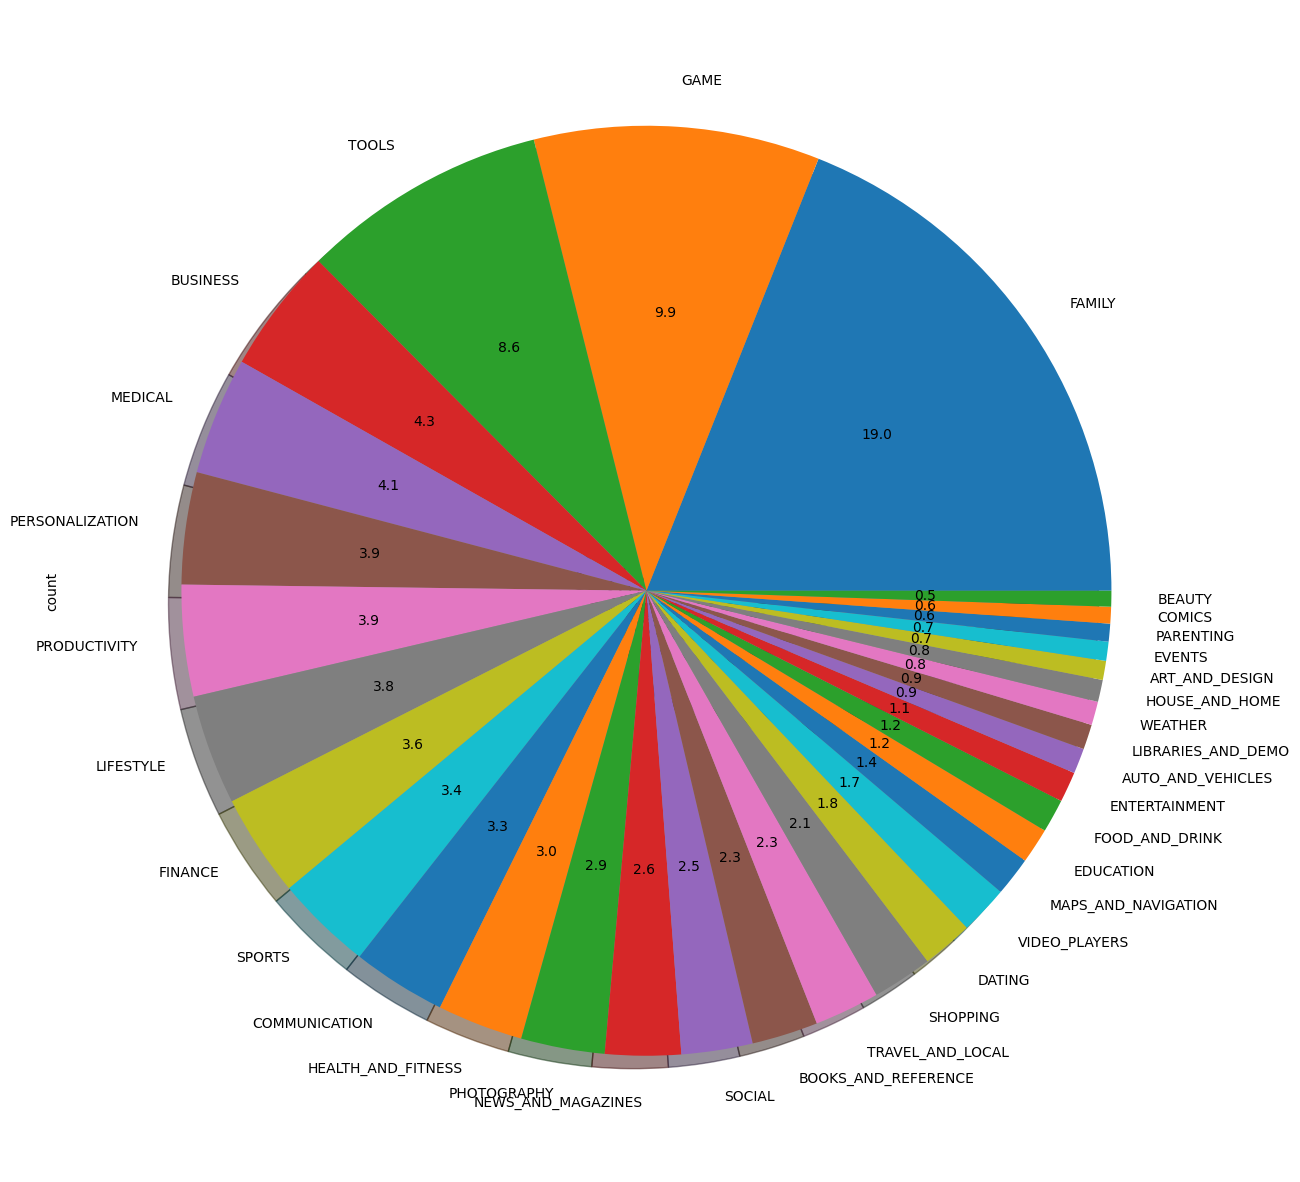

In [71]:
df_copy['Category'].value_counts().plot.pie(y=df_copy['Category'],figsize=(15, 16), autopct='%1.1f', shadow=True)
plt.show()

##### General Observation

General-purpose and widely accessible categories (Family, Game, Tools) have a significantly higher app count than niche or single-concept categories (Beauty, Events, Weather). This pattern indicates that the app store's inventory is heavily weighted toward mass-market appeal.

*The most popular category in dataset is Family with early 19% of the entire dataset.*

Top 10 App Cateories:

In [75]:
category = pd.DataFrame(df['Category'].value_counts())
category.rename(columns={'Category': 'Count'}, inplace=True)

category

,count
Category,
FAMILY,1972
GAME,1144
TOOLS,843
MEDICAL,463
BUSINESS,460
PRODUCTIVITY,424
PERSONALIZATION,392
COMMUNICATION,387
SPORTS,384


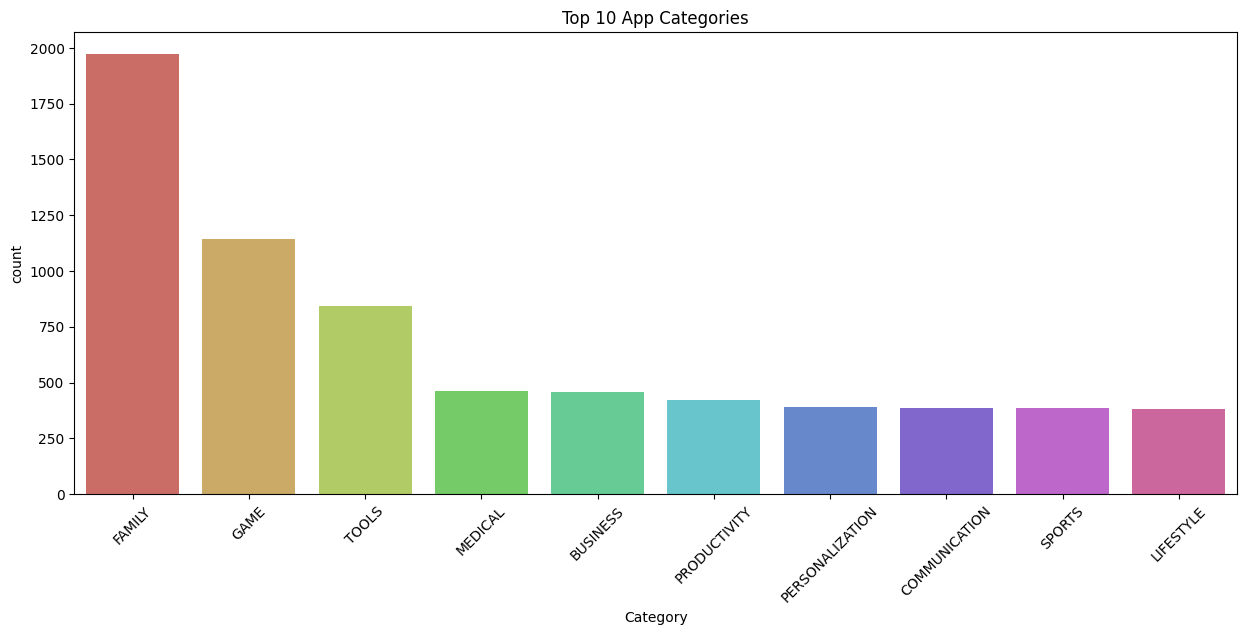

In [78]:
plt.figure(figsize=(15, 6))
sns.barplot(x=category.index[:10], y='count', hue=category.index[:10], data = category[:10], palette='hls')
plt.title('Top 10 App Categories')
plt.xticks(rotation=45)
plt.show()